In [24]:
import numpy as np
import pandas as pd

In [25]:
df=pd.read_csv("/content/customer_churn_dataset-testing-master.csv")

In [26]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [27]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [28]:
df=df.drop(columns={"Gender","Subscription Type","Contract Length",})

In [29]:
df.sample()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
32206,32207,37,43,13,8,18,941,10,1


In [30]:
x=df.drop(columns="Churn")
y=df["Churn"]

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)

In [34]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((51499, 8), (12875, 8), (51499,), (12875,))

In [35]:
xtrain_trans=scaler.fit_transform(xtrain)
xtest_trans=scaler.transform(xtest)


In [51]:
xtrain_trans[:10]

array([[-1.00468516,  1.00748863,  0.58691645, -0.46172589, -1.73383506,
        -0.80597895,  0.96828798, -0.05782578],
       [-0.64705319,  0.86400944,  1.63912853, -1.14230525, -0.77004023,
        -0.9188338 ,  0.26657637,  0.98455628],
       [ 0.87452295, -0.78600122, -1.16677034, -1.48259492,  1.15754942,
        -1.14454349, -1.22120563,  1.67947765],
       [ 0.53646663, -0.64252203, -0.58220808,  0.21885346, -0.12751035,
         0.88684376,  0.41228698,  0.52127537],
       [ 1.23527412, -0.21208447, -0.23147072,  1.69344206, -1.09130517,
         0.88684376,  1.69684102,  0.75291582],
       [ 0.8295635 , -1.28817837, -0.93294544, -0.68858568, -1.41257012,
         1.451118  ,  0.5886735 ,  0.75291582],
       [ 1.65308506,  0.07487391,  1.52221607, -0.91544546, -1.73383506,
         0.66113406, -1.02564666, -0.75274715],
       [ 0.09520793,  0.00313431,  1.05456626,  0.55914314, -0.77004023,
        -0.46741441,  1.6699996 , -1.33184829],
       [-0.60709521,  0.86400944

In [36]:
import tensorflow
from tensorflow.keras import Sequential, layers
from keras.layers import Dense

In [37]:
model=Sequential()
model.add(Dense(2,activation="relu",input_dim=8))
model.add(Dense(1,activation="sigmoid"))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.get_weights()

[array([[ 0.6896857 ,  0.38688707],
        [ 0.15694141,  0.32692277],
        [-0.49714515, -0.61296463],
        [-0.02907461, -0.6194424 ],
        [ 0.31418312, -0.25729078],
        [-0.25681484,  0.60137427],
        [ 0.62052596, -0.27081215],
        [ 0.10985881, -0.37887517]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.662831  ],
        [-0.11920273]], dtype=float32),
 array([0.], dtype=float32)]

In [39]:
initialweights=model.get_weights()

In [40]:
zero_weights = [np.zeros_like(w) for w in initialweights]

In [41]:
model.set_weights(zero_weights)


In [42]:
model.get_weights()

[array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [43]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [45]:
history=model.fit(xtrain_trans,ytrain,validation_split=0.2,epochs=50)

Epoch 1/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5265 - loss: 0.6918 - val_accuracy: 0.5263 - val_loss: 0.6918
Epoch 2/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5253 - loss: 0.6919 - val_accuracy: 0.5263 - val_loss: 0.6918
Epoch 3/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5283 - loss: 0.6916 - val_accuracy: 0.5263 - val_loss: 0.6918
Epoch 4/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5262 - loss: 0.6918 - val_accuracy: 0.5263 - val_loss: 0.6918
Epoch 5/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5258 - loss: 0.6918 - val_accuracy: 0.5263 - val_loss: 0.6918
Epoch 6/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5237 - loss: 0.6921 - val_accuracy: 0.5263 - val_loss: 0.6918
Epoch 7/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5204 - loss: 0.6924 - val_accuracy: 0.5263 - val_loss: 0.6918
Epoch 8/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5290 - loss: 0.6915 - 

In [46]:
model.get_weights() # after training model weights

[array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.103839], dtype=float32)]

In [53]:
import matplotlib.pyplot as plt


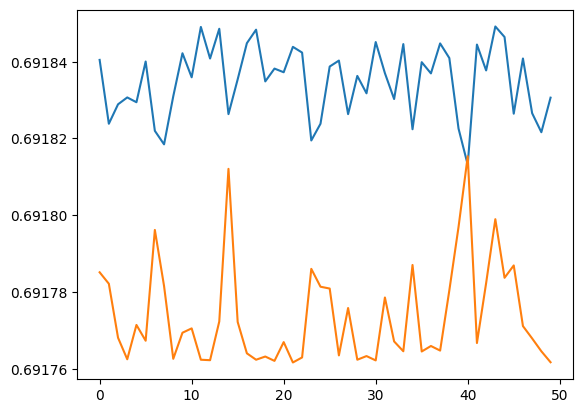

In [54]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

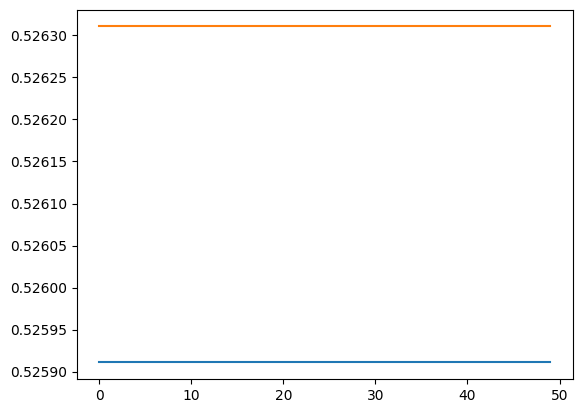

In [55]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

no training at all

# tan h

In [65]:
model2=Sequential()
model2.add(Dense(2,activation="tanh",input_dim=8))
model2.add(Dense(1,activation="sigmoid"))
model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
model2.get_weights()

[array([[ 0.4394238 ,  0.05874562],
        [-0.5319288 ,  0.20773828],
        [ 0.16048539, -0.19949222],
        [-0.60557973,  0.24817026],
        [ 0.39464915,  0.5378251 ],
        [ 0.56217   ,  0.71497643],
        [ 0.6845592 , -0.17133045],
        [-0.50009316, -0.5158689 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.1059778 ],
        [ 0.40033102]], dtype=float32),
 array([0.], dtype=float32)]

In [67]:
initialweights=model2.get_weights()

In [68]:
zero_weights = [np.zeros_like(w) for w in initialweights]

In [69]:
model2.set_weights(zero_weights)


In [71]:
model2.get_weights()

[array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [72]:
model2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [73]:
history=model2.fit(xtrain_trans,ytrain,validation_split=0.2,epochs=50)

Epoch 1/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5215 - loss: 0.6925 - val_accuracy: 0.5263 - val_loss: 0.6918
Epoch 2/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5203 - loss: 0.6924 - val_accuracy: 0.5263 - val_loss: 0.6918
Epoch 3/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5246 - loss: 0.6920 - val_accuracy: 0.5263 - val_loss: 0.6918
Epoch 4/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5270 - loss: 0.6917 - val_accuracy: 0.5263 - val_loss: 0.6918
Epoch 5/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5286 - loss: 0.6916 - val_accuracy: 0.5263 - val_loss: 0.6918
Epoch 6/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5257 - loss: 0.6919 - val_accuracy: 0.5263 - val_loss: 0.6918
Epoch 7/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5291 - loss: 0.6915 - val_accuracy: 0.5263 - val_loss: 0.6918
Epoch 8/50
1288/1288 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5231 - loss: 0.6921 - 

In [74]:
model2.get_weights() # after training model weights

[array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.09139764], dtype=float32)]

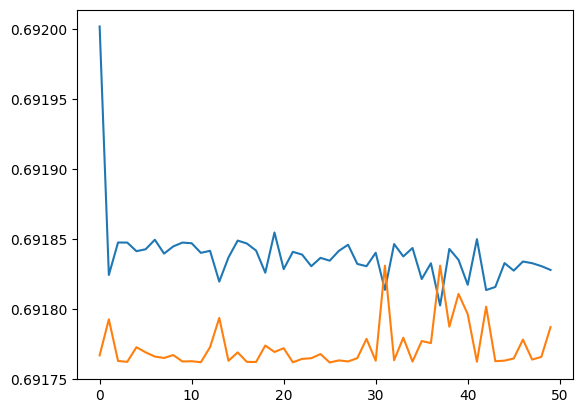

In [75]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

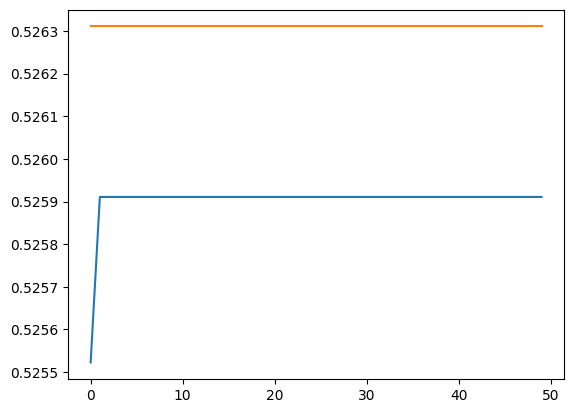

In [76]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

no training